In [1]:
import numpy as np
np.random.seed(1001)

import os
import shutil
import warnings

import IPython
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tqdm import tqdm_notebook
from sklearn.model_selection import StratifiedKFold

matplotlib.style.use('ggplot')
warnings.filterwarnings('ignore', category=FutureWarning)


In [2]:
os.listdir('../input')



['train_noisy',
 'train_curated.csv',
 'test.zip',
 'train_curated',
 'train_noisy.csv',
 'sample_submission.csv']

In [3]:
train = pd.read_csv("../input/train_curated.csv")
test = pd.read_csv("../input/sample_submission.csv")



In [4]:
train.shape

(4970, 2)

In [5]:
print("Number of train examples=", train.shape[0], "Number of classes", len(set(train.labels)))
print("Number of test examples=", test.shape[0], "number of classes=", len(set(test.columns[1:])))


Number of train examples= 4970 Number of classes 213
Number of test examples= 3361 number of classes= 80


In [6]:
test.columns

Index(['fname', 'Accelerating_and_revving_and_vroom', 'Accordion',
       'Acoustic_guitar', 'Applause', 'Bark', 'Bass_drum', 'Bass_guitar',
       'Bathtub_(filling_or_washing)', 'Bicycle_bell',
       'Burping_and_eructation', 'Bus', 'Buzz', 'Car_passing_by', 'Cheering',
       'Chewing_and_mastication', 'Child_speech_and_kid_speaking',
       'Chink_and_clink', 'Chirp_and_tweet', 'Church_bell', 'Clapping',
       'Computer_keyboard', 'Crackle', 'Cricket', 'Crowd',
       'Cupboard_open_or_close', 'Cutlery_and_silverware',
       'Dishes_and_pots_and_pans', 'Drawer_open_or_close', 'Drip',
       'Electric_guitar', 'Fart', 'Female_singing',
       'Female_speech_and_woman_speaking', 'Fill_(with_liquid)',
       'Finger_snapping', 'Frying_(food)', 'Gasp', 'Glockenspiel', 'Gong',
       'Gurgling', 'Harmonica', 'Hi-hat', 'Hiss', 'Keys_jangling', 'Knock',
       'Male_singing', 'Male_speech_and_man_speaking', 'Marimba_and_xylophone',
       'Mechanical_fan', 'Meow', 'Microwave_oven', 'Mo

In [7]:
test.head()

,fname,Accelerating_and_revving_and_vroom,Accordion,Acoustic_guitar,Applause,Bark,Bass_drum,Bass_guitar,Bathtub_(filling_or_washing),Bicycle_bell,...,Toilet_flush,Traffic_noise_and_roadway_noise,Trickle_and_dribble,Walk_and_footsteps,Water_tap_and_faucet,Waves_and_surf,Whispering,Writing,Yell,Zipper_(clothing)
0,4260ebea.wav,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,426eb1e0.wav,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,428d70bb.wav,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4292b1c9.wav,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,429c5071.wav,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
train.columns

Index(['fname', 'labels'], dtype='object')

In [9]:
train.head()

,fname,labels
0,0006ae4e.wav,Bark
1,0019ef41.wav,Raindrop
2,001ec0ad.wav,Finger_snapping
3,0026c7cb.wav,Run
4,0026f116.wav,Finger_snapping


In [10]:
train = train[train.labels.isin(test.columns[1:])]
print(len(train))


4269


In [11]:
category_group = train.groupby(['labels']).count()
category_group.columns = ['counts']
print(len(category_group))


74


Text(0, 0.5, 'Number of Samples')

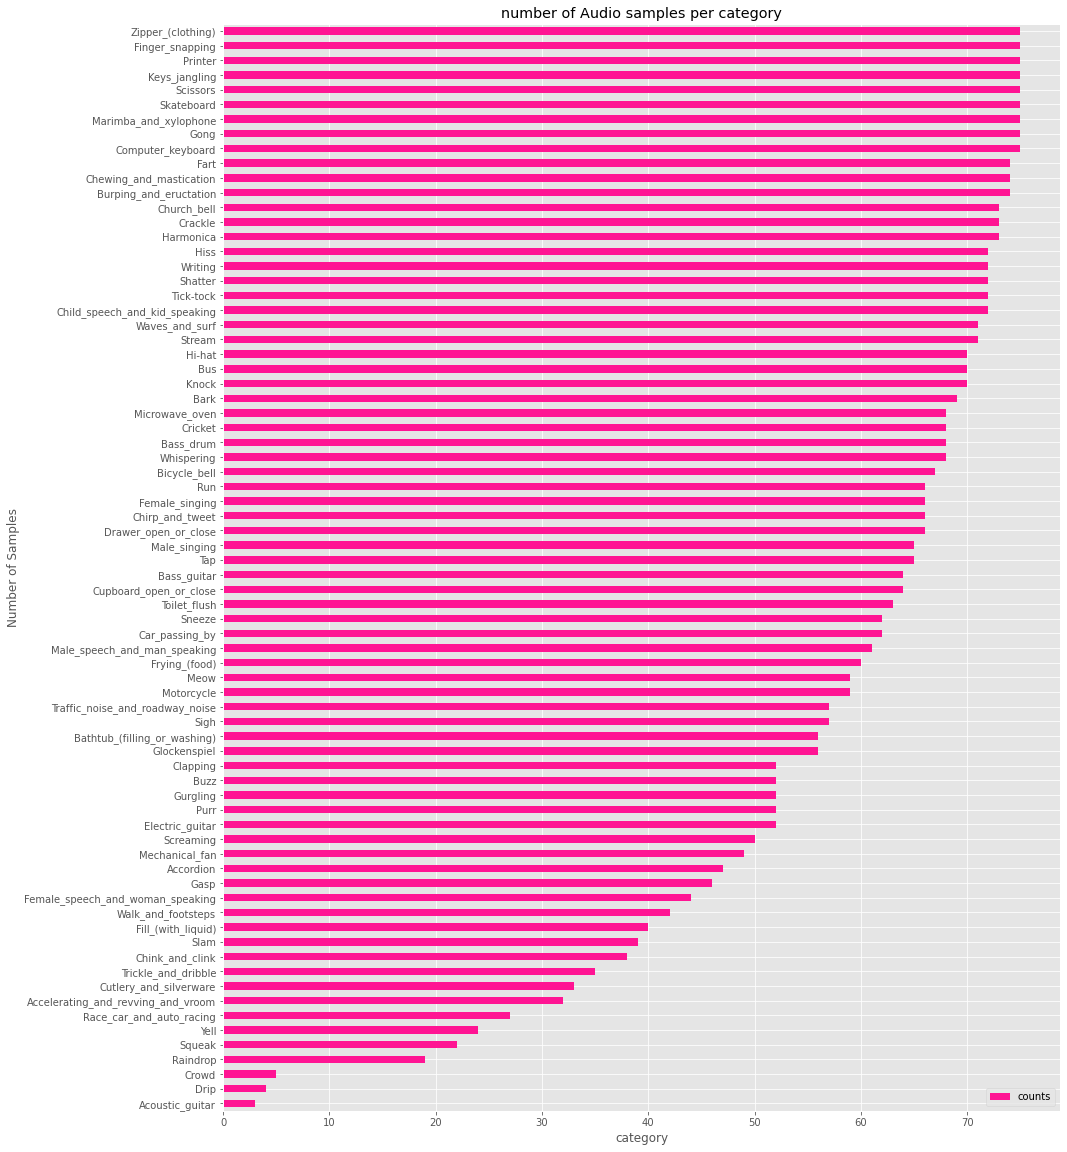

In [12]:
plot = category_group.sort_values(ascending=True, by='counts').plot(
    kind='barh',
    title='number of Audio samples per category',
    color='deeppink',figsize=(15,20)
)

plot.set_xlabel('category')
plot.set_ylabel("Number of Samples")


In [13]:
print("Minimum samples per category = ", min(train.labels.value_counts()))
print("Maximum samples per category = ", max(train.labels.value_counts()))


Minimum samples per category =  3
Maximum samples per category =  75
